셔플링을 최소화 하려면,,,
* 미리 파티션을 만들어 두고 캐싱 후
    * resduceByKey 실행
    * join 실행
* 둘다 파티션과 캐싱을 조합해서 최대한 로컬 환경에서 연산이 실행되도록 하는 방식
( 각각의 파티션에서 연산이 실행되는 것을 의미)

**셔플을 최소화 해서 10배의 성능 향상이 가능하다!**

reduceByKey VS groupByKey

In [ ]:
# 둘의 결과는 같지만 성능에는 확연한 차이가 있음!
# flatmap, map까지는 동일한 노드에서 실행된다. 하지만 reducer 부분에서는 모두 동일한 단어쌍을 노드로 이동시켜야 하기 때문에 shuffle이 발생하게 되고,,



# reduceByKey
'''
먼저 각 노드에서 중간 집계를 하고, 이에 대한 결과를 동일한 key값으로 전송하게 됨.
'''
(textRDD
.flatMap(lambda line: line.split())
.map(lambda wordL (word, 1))
.reduceByKey(lambda a, b: a + b))

# groupByKey: 얘가 성능이 훨씬 안좋음.
''' 
각 노드에 있는 데이터에 바로 셔플 과정을 거치고 결과를 내보냄. 따라서 네트워크를 통해 전송되는 데이터의 양이 많아지게 됨.
out of disk 문제가 발생할 수도 있음
셔플은 기본적으로 비용이 큰 연산이기 때문에 gorupByKey는 reduceByKey로 대체될 수 있다.
'''
(textRDD
.flatMap(lambda line: line.split())
.map(lambda wordL (word, 1))
.groupByKey()
.map(lambda (w, counts): (w, sum(counts))))

# Partition의 목적
**데이터를 최대한 균일하게 퍼트리고 쿼리가 같이 되는 데이터를 최대한 옆에 두어 검색 성능을 향상시키는 것**  
파티션은 paired RDD일 때만 의미가 있는데, 그 이유는 일반 RDD는 어떤 데이터를 가져오기 위해서든 처음부터 끝까지 한번 스캐닝을 해야 함.  
파티션을 잘하게 되면, 예를 들어 해시로 파티셔닝 했을 때 어떤 데이터를 찾고싶다 하면 키를 기준으로 바로 찾을 수 있게된다. 그러면 검색 성능을 많이 향상 시킬 수 있다.   
**스파크의 파티셔닝 == 일반 프로그래밍에서 자료구조를 선택하는 것**

# Partition의 종류
* Hash Partitoning: 데이터를 여러 파티션에 균일하게 분배하는 방식 -> 딕셔너리와 비슷
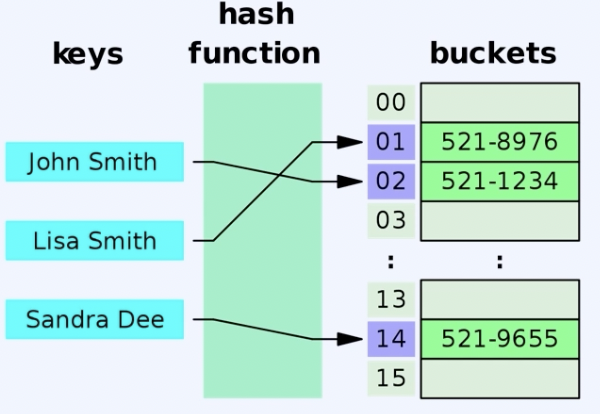
* Range Partitoning
    * 순서가 있는, 정렬된 파티셔닝
        * 키의 순서에 따라
        * 키의 집합의 순서에 따라
    * 서비스의 쿼리 패턴이 날짜 위주면 일별 Range partiton 고려
    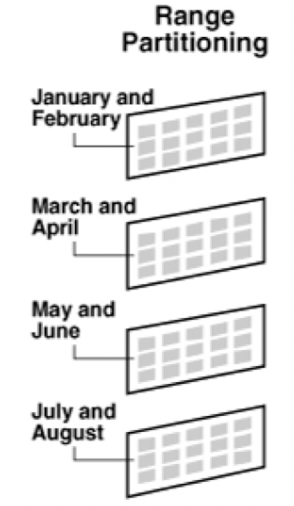

In [ ]:
# 디스크에서 partition 하기
partitionBy()

# 메모리에서 partition 하기
* repartition()
* coalesce()

In [1]:
pairs = sc.parallelize([1, 2, 3, 4, 2, 4, 1]).map(lambda x: (x, x))
pairs.collect()

NameError: name 'sc' is not defined